Riley Babson, Jay Giradkar, Ally DiStefano
MIS 545 02

In [1]:
#general / data cleaning imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read songAttributes_1999-2019.csv into a data frame called songAtts.
songAtts = pd.read_csv('songAttributes_1999-2019.csv')

# GENERAL CLEANING

In [3]:
songAtts.head()

,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [4]:
#drop the string columnsconvert the explicit/mode column to an integer (0 or 1)
songAtts = songAtts.drop(['Album','Artist', 'Name'], axis=1)

#convert the duration column to seconds
songAtts['Duration'] = songAtts['Duration'] / 1000

#convert the explicit/mode column to an integer (0 or 1)
songAtts['Explicit'] = songAtts['Explicit'].astype(int)
songAtts['Mode'] = songAtts['Mode'].astype(int)

songAtts.head()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,0.520,234.947,0.904,0,0.010300,0.0634,-5.030,1,35,0.0309,106.022,4,0.365
1,0.018200,0.581,239.573,0.709,0,0.000664,0.1740,-4.909,1,31,0.0282,120.027,4,0.408
2,0.000473,0.572,198.400,0.918,0,0.000431,0.0977,-3.324,0,30,0.0559,144.061,4,0.370
3,0.000970,0.596,231.453,0.661,0,0.000033,0.1130,-5.051,1,35,0.0254,111.975,4,0.183
4,0.000036,0.520,222.520,0.808,0,0.000010,0.0800,-4.553,0,21,0.0318,92.721,4,0.666


In [5]:
#prenormalized data
songAtts.describe().round(2)

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
count,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00,154931.00
mean,0.27,0.58,232.44,0.64,0.21,0.06,0.25,-8.03,0.68,20.25,0.12,119.22,3.90,0.50
std,0.30,0.17,120.52,0.23,0.41,0.20,0.23,4.16,0.47,16.51,0.15,30.97,0.47,0.24
min,0.00,0.00,1.73,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.47,188.91,0.48,0.00,0.00,0.10,-9.85,0.00,6.00,0.03,94.37,4.00,0.31
50%,0.13,0.59,224.75,0.68,0.00,0.00,0.15,-6.99,1.00,17.00,0.05,118.86,4.00,0.50
75%,0.45,0.70,263.65,0.83,0.00,0.00,0.33,-5.17,1.00,31.00,0.14,139.82,4.00,0.69
max,1.00,0.99,4795.97,1.00,1.00,1.00,1.00,3.52,1.00,91.00,0.97,248.06,5.00,1.00


In [6]:
#find outliers in each of the columns 
#instrumentalness is not included because it had an extremely skewed distribution, which caused thousands of outliers
#loudness is excluded because the scale is opposite than the other columns

for col in songAtts.columns:
    if col not in ['Explicit', 'Mode', 'Instrumentalness', 'Loudness']:
        lb = songAtts[col].quantile(0.25) - (songAtts[col].quantile(0.25) * 2.5)
        ub = songAtts[col].quantile(0.75) + (songAtts[col].quantile(0.75) * 2.5)

        numOutliers = len(songAtts[(songAtts[col] < lb) | (songAtts[col] > ub)])
        outliers = songAtts[(songAtts[col] < lb) | (songAtts[col] > ub)][col]
        
        if numOutliers > 0:
            songAtts = songAtts.drop(outliers.index, axis=0)


In [7]:
#prenormalized without outliers
songAtts.describe().round(2)

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
count,150758.00,150758.00,150758.00,150758.00,150758.0,150758.00,150758.00,150758.00,150758.00,150758.00,150758.00,150758.00,150758.00,150758.00
mean,0.26,0.57,232.61,0.64,0.2,0.06,0.25,-7.87,0.68,20.52,0.11,119.48,3.91,0.50
std,0.30,0.17,79.04,0.23,0.4,0.20,0.23,3.99,0.46,16.52,0.11,30.81,0.45,0.24
min,0.00,0.00,1.73,0.00,0.0,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.47,191.08,0.49,0.0,0.00,0.10,-9.66,0.00,6.00,0.03,94.91,4.00,0.31
50%,0.12,0.58,225.69,0.68,0.0,0.00,0.15,-6.91,1.00,18.00,0.05,119.35,4.00,0.50
75%,0.43,0.70,264.19,0.83,0.0,0.00,0.32,-5.13,1.00,31.00,0.13,139.90,4.00,0.69
max,1.00,0.99,920.84,1.00,1.0,1.00,1.00,3.52,1.00,91.00,0.51,248.06,5.00,0.99


In [8]:
#normalize the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
songAtts = pd.DataFrame(min_max_scaler.fit_transform(songAtts), columns=songAtts.columns)

In [9]:
#Create a 'popCat' column that separate the 'Popularity' column into intervals of 20
songAtts['popCat'] = pd.cut(songAtts['Popularity'], bins=[-0.01, 0.19, 0.39, 0.59, 0.79, 1], labels=False)
songAtts['popCat'] = songAtts['popCat'].astype(int)

#create a popYN column that is a 0 if the song is below 75 in the popularity column and 1 if it is above 75
songAtts['popYN'] = songAtts['Popularity'].apply(lambda x: 1 if x >= 0.40 else 0)

In [10]:
#display summary statistics of songAtts before outlier removal
songAtts.describe().round(4)

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,popCat,popYN
count,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000,150758.0000
mean,0.2598,0.5817,0.2512,0.6432,0.2050,0.0643,0.2499,0.8207,0.6843,0.2255,0.2070,0.4817,0.7819,0.5012,0.7405,0.1731
std,0.2976,0.1708,0.0860,0.2303,0.4037,0.2017,0.2294,0.0628,0.4648,0.1815,0.2164,0.1242,0.0894,0.2426,0.8740,0.3784
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0193,0.4721,0.2060,0.4900,0.0000,0.0000,0.1010,0.7925,0.0000,0.0659,0.0677,0.3826,0.8000,0.3091,0.0000,0.0000
50%,0.1225,0.5917,0.2437,0.6820,0.0000,0.0000,0.1500,0.8358,1.0000,0.1978,0.1004,0.4811,0.8000,0.5000,1.0000,0.0000
75%,0.4357,0.7052,0.2856,0.8310,0.0000,0.0010,0.3200,0.8639,1.0000,0.3407,0.2524,0.5640,0.8000,0.6929,1.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.0000,1.0000


<AxesSubplot:>

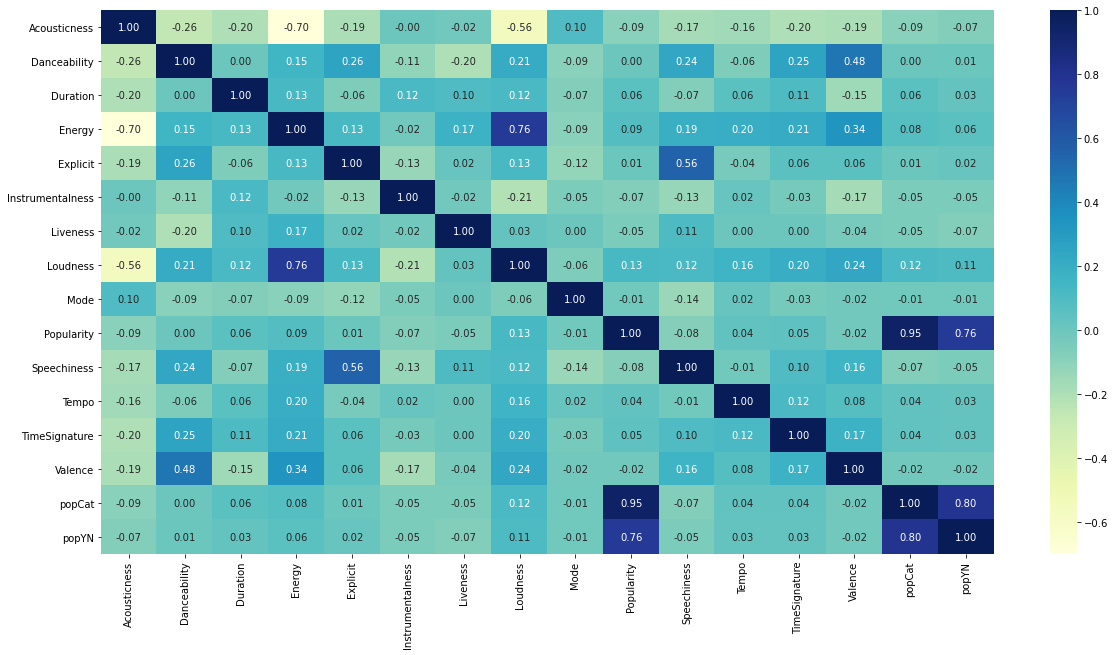

In [11]:
#display a correlation plot with both values and colors.
plt.figure(figsize=(20,10))
sns.heatmap(songAtts.corr().round(2), cmap="YlGnBu", annot=True, fmt=".2f")

# LOGISTIC REGRESSION

#### Question:

Which features could we use to predict whether or not the song is popular?

#### Hypthesis:
We predict both 'Energy' and 'Danceability' will impact if the song is popular or not.

In [12]:
#logistic regression specific imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [13]:
#randomly split the data into training and testing (3:1)
songAttsTraining, songAttsTesting = train_test_split(songAtts.drop(['Popularity', 'popCat'], axis = 1), test_size=0.25, random_state=42)

In [14]:
#check if we have a class imbalance issue in popYN.
songAttsTraining['popYN'].value_counts()

0    93473
1    19595
Name: popYN, dtype: int64

In [113]:
#deal with class imbalance using the SMOTE technique using a sampling_strategy of 1.0
sm = SMOTE(sampling_strategy=1.0, random_state=42)
X_res, y_res = sm.fit_resample(songAttsTraining, songAttsTraining['popYN'])
songAttsTrainingSmoted = pd.DataFrame(X_res, columns=songAttsTraining.columns)
songAttsTrainingSmoted['popYN'] = y_res

In [114]:
#deal with class imbalance using the SMOTE technique using a sampling_strategy of 1.0.
sm = SMOTE(sampling_strategy=1.0, random_state=42)
X_res, y_res = sm.fit_resample(songAttsTesting, songAttsTesting['popYN'])
songAttsTestingSmoted = pd.DataFrame(X_res, columns=songAttsTesting.columns)
songAttsTestingSmoted['popYN'] = y_res

In [115]:
#convert popYN back into logical types.
songAttsTrainingSmoted['popYN'] = songAttsTrainingSmoted['popYN'].astype('bool')
songAttsTestingSmoted['popYN'] = songAttsTestingSmoted['popYN'].astype('bool')

In [116]:
#check for class imbalance on the smoted dataset
songAttsTrainingSmoted['popYN'].value_counts()

False    93473
True     93473
Name: popYN, dtype: int64

In [117]:
#generate the logistic regression model (using popYN as the binary dependent variable) and save it in an object called songAttsModel.
logModel = LogisticRegression().fit(songAttsTrainingSmoted.drop(['popYN'], axis=1), songAttsTrainingSmoted['popYN'])


In [118]:
#display the logistic regression model coefficients
logCoefs = logModel.coef_
logCoefs

array([[-0.12913504,  0.00657606,  0.72458752, -0.06791714,  0.4145832 ,
        -0.64366875, -0.98143581,  6.06878319, -0.06311887, -1.32176116,
         0.33800704,  0.76596089, -0.59674124]])

In [119]:
#calculate the odds ratios for each of the 7 independent variable coefficients.
logOdds = np.exp(logModel.coef_)
logOdds

array([[8.78855279e-01, 1.00659773e+00, 2.06387962e+00, 9.34337890e-01,
        1.51373969e+00, 5.25361462e-01, 3.74772611e-01, 4.32154513e+02,
        9.38831869e-01, 2.66665249e-01, 1.40215038e+00, 2.15106031e+00,
        5.50602996e-01]])

In [120]:
logProbs = logOdds / (1 + logOdds)
logProbs

array([[0.46776103, 0.50164401, 0.67361642, 0.48302724, 0.60218633,
        0.34441768, 0.27260698, 0.99769136, 0.48422552, 0.21052543,
        0.58370633, 0.68264651, 0.3550896 ]])

In [121]:
#create a df with the coefficients, odds ratios, and probabilities in the same dateframe
logCoefs = pd.DataFrame(logCoefs, columns=songAttsTrainingSmoted.drop(['popYN'], axis=1).columns).transpose()
logOdds = pd.DataFrame(logOdds, columns=songAttsTrainingSmoted.drop(['popYN'], axis=1).columns).transpose()
logProbs = pd.DataFrame(logProbs, columns=songAttsTrainingSmoted.drop(['popYN'], axis=1).columns).transpose()

logResults = pd.concat([logCoefs, logOdds, logProbs], axis=1)
logResults.columns = ['Coefficients', 'Odds Ratios', 'Probabilities']
logResults.sort_values(by='Probabilities', ascending=True)

,Coefficients,Odds Ratios,Probabilities
Speechiness,-1.321761,0.266665,0.210525
Liveness,-0.981436,0.374773,0.272607
Instrumentalness,-0.643669,0.525361,0.344418
Valence,-0.596741,0.550603,0.355090
Acousticness,-0.129135,0.878855,0.467761
Energy,-0.067917,0.934338,0.483027
Mode,-0.063119,0.938832,0.484226
Danceability,0.006576,1.006598,0.501644
Tempo,0.338007,1.402150,0.583706
Explicit,0.414583,1.513740,0.602186


In [122]:
#use the model to predict outcomes in the testing dataset. 
logPredictions = logModel.predict(songAttsTestingSmoted.drop(['popYN'], axis=1))

In [123]:
#generate a confusion matrix of predictions
logCM = confusion_matrix(songAttsTestingSmoted['popYN'], logPredictions.round())
logCM

array([[16645, 14539],
       [10441, 20743]], dtype=int64)

In [124]:
#find the accuracy
logAccuracy = (logCM[0][0]+logCM[1][1])/(logCM[0][0]+logCM[1][1]+logCM[0][1]+logCM[1][0])
logAccuracy = round(logAccuracy, 4)
logAccuracy

0.5995

#### Conclusion:

There are no statistically significant features in the logistic regression model. The feature that is the closest speechiness with a P-value of 0.06 and a coefficient of -2.69, which makes sense because songs with more spoken words are considerably less popular. Regardless of the lack of significance in the coefficients, the model was still able to predict correctly 59.95% of the time.

# K-NEAREST NEIGHBORS

#### Question:
Given the attributes of a song, what is the probability that we could predict the popularity category (groups of 20) of that song?

#### Hypothesis: 
We think, given the attributes like danceability, energy, and valence, we could get within 75% accurate.

In [15]:
#KNN specific imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [16]:
#randomly split the data into training and testing (3:1)
songAttsTraining, songAttsTesting = train_test_split(songAtts.drop(['Popularity', 'popYN'], axis = 1), test_size=0.25, random_state=42)

In [17]:
#deal with class imbalance using the SMOTE technique using a sampling_strategy of 1.0. Save the result into a new data frame called songAttsTrainingSmoted.
sm = SMOTE(sampling_strategy='not majority', random_state=42)
X_res, y_res = sm.fit_resample(songAttsTraining, songAttsTraining['popCat'])
songAttsTrainingSmoted = pd.DataFrame(X_res, columns=songAttsTraining.columns)
songAttsTrainingSmoted['popCat'] = y_res

sm = SMOTE(sampling_strategy='not majority', random_state=42)
X_res, y_res = sm.fit_resample(songAttsTesting, songAttsTesting['popCat'])
songAttsTestingSmoted = pd.DataFrame(X_res, columns=songAttsTesting.columns)
songAttsTestingSmoted['popCat'] = y_res

In [18]:
#standardize the data
scaler = StandardScaler()
scaler.fit(songAttsTrainingSmoted.drop(['popCat'], axis=1))
songAttsTrainingSmotedScaled = scaler.transform(songAttsTrainingSmoted.drop(['popCat'], axis=1))
songAttsTestingSmotedScaled = scaler.transform(songAttsTestingSmoted.drop(['popCat'], axis=1))

In [19]:
songAttsTrainingSmoted['popCat'].value_counts()

0    55689
1    55689
2    55689
3    55689
4    55689
Name: popCat, dtype: int64

In [20]:
#fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(songAttsTrainingSmotedScaled, songAttsTrainingSmoted['popCat'])

KNeighborsClassifier(n_neighbors=3)

In [21]:
#predict on test data
knnPredictions = knn.predict(songAttsTestingSmotedScaled)

In [22]:
#confusion matrix
knnCM = confusion_matrix(songAttsTestingSmoted['popCat'], knnPredictions)
knnCM

array([[8669, 4784, 3076, 1717,  416],
       [5969, 6086, 3940, 2091,  576],
       [5105, 4874, 5324, 2667,  692],
       [4194, 4159, 4842, 4506,  961],
       [4376, 3397, 4069, 3902, 2918]], dtype=int64)

Text(0.5, 1.0, 'k-Nearest Neighbors Confusion Matrix')

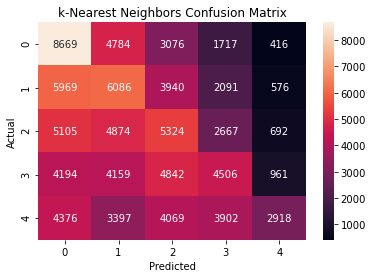

In [23]:
#graph the confusion matrix
sns.heatmap(knnCM, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('k-Nearest Neighbors Confusion Matrix')

In [24]:
#accuracy percentage
accuracy_score(songAttsTestingSmoted['popCat'], knnPredictions)

0.2947486871717929

#### Conclusion:

Given all of the attributes from the dataset, k-Nearest Neighbors was only able to predict the correct category of popularity (groups of 20) 29.47% of the time. Since this number is low, we continued trying to find a better model with the same question and hypothesis below using random forest.

# RANDOM FOREST

#### Question:
The k-Nearest Neighbors model did not have a very high accuracy, so the question remains: given the attributes of a song, what is the probability that we could predict the popularity category (groups of 20) of that song?

#### Hypothesis: 
We still think, given the attributes like acousticness, energy, and valence, we could get within 75% accurate.

In [135]:
#random forest specific imports
from sklearn.ensemble import RandomForestClassifier

In [136]:
#split the data into training and testing sets
X = songAtts.drop(['popCat', 'Popularity', 'popYN'], axis=1)
y = songAtts['popCat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
#standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
#initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [139]:
#fit the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [140]:
#predict on the test data
rfPredictions = rf_classifier.predict(X_test_scaled)

In [141]:
#confusion matrix
rfCM = confusion_matrix(y_test, rfPredictions)
rfCM

array([[15454,  2975,   217,    16,     0],
       [ 7932,  3734,   322,    40,     5],
       [ 3270,  1520,   540,    48,     2],
       [  886,   350,   101,    98,     1],
       [  112,    35,    11,     3,    18]], dtype=int64)

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

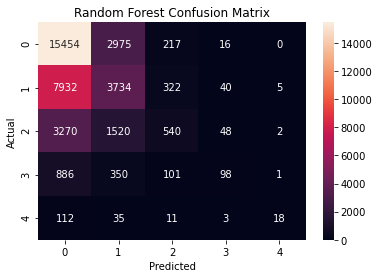

In [142]:
#graph the confusion matrix
sns.heatmap(rfCM, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

In [143]:
#normalize the confusion matrix
rfCMnorm = (rfCM.astype('float') / rfCM.sum(axis=1)[:, np.newaxis]).round(4)
rfCMnorm

array([[8.281e-01, 1.594e-01, 1.160e-02, 9.000e-04, 0.000e+00],
       [6.592e-01, 3.103e-01, 2.680e-02, 3.300e-03, 4.000e-04],
       [6.078e-01, 2.825e-01, 1.004e-01, 8.900e-03, 4.000e-04],
       [6.170e-01, 2.437e-01, 7.030e-02, 6.820e-02, 7.000e-04],
       [6.257e-01, 1.955e-01, 6.150e-02, 1.680e-02, 1.006e-01]])

Text(0.5, 1.0, 'Random Forest Normalized Confusion Matrix')

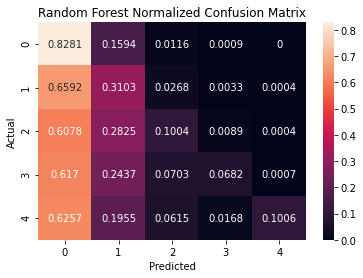

In [144]:
#graph the normalized confusion matrix
sns.heatmap(rfCMnorm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Normalized Confusion Matrix')

In [145]:
#accuracy score
rfAccuracy = accuracy_score(y_test, rfPredictions)
rfAccuracy

0.5265057044308835

#### Conclusion:
 
 Given the attributes (acousticness, energy, and valence) Random Forest classifier was able to predict better with 52.65% accuracy. Its confusion matrix highlighted strengths and areas for improvement. Further optimization could enhance its predictive capability, affirming attribute relevance in categorizing songs.

# k-MEANS CLUSTERING

#### Question:
Using the acousticness of a song, is it possible to predict the instrumentalness of the song?

#### Hypothesis:
We think that instrumentalness and acousticness should go hand-in-hand, at least to an extent. For this reason, we believe it should be possible to predict the instrumentalness with reasonable accuracy.

In [146]:
#k-means specific imports
from sklearn.cluster import KMeans

In [147]:
#assign the features to X
X = songAtts[['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']]
 
#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [148]:
#initialize KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [149]:
#fit KMeans to the scaled data
kmeans.fit(X_scaled)

c:\Users\riley\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [150]:
#add cluster labels to the original dataset
songAtts['Cluster'] = kmeans.labels_

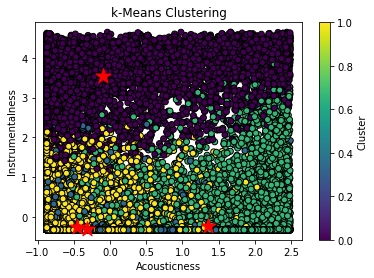

In [151]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], c='red', marker='*', s=250, label='Centers')
plt.title('k-Means Clustering')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.colorbar(label='Cluster')
plt.show()

#### Conclusion:

After looking at the results in the above plot, especially the cluster centers, it is obvious that it is difficult to tell apart the categories, especially between labels 2 and 3 (bottom left).

We established that this model would work better with a more categorical target variable, preferably genre (at least for the colors).

## NAIVE BAYES FOR MODELING DANCEABILITY

#### Question:
Assuming we were given the rest of the attributes (including 'Popularity', but without its categories) for a random song, how accurately could we predict the 'danceability' of that song?

#### Hypothesis:
Intuitively, since things like tempo and valence tend to impact danceability, we think we could get within 80% accurate of guessing which category of danceability the song could fall into.

In [152]:
# naive bayes specific imports
from sklearn.naive_bayes import GaussianNB

In [153]:
songAtts['danceCat'] = pd.cut(songAtts['Danceability'], bins=[-0.01, 0.19, 0.39, 0.59, 0.79, 1], labels=False)
songAtts['danceCat'] = songAtts['danceCat'].astype(int)

In [154]:
#split the data into training and testing sets
X = songAtts.drop(['danceCat', 'popYN', 'popCat'], axis=1)
y = songAtts['danceCat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [155]:
# Initialize the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

In [156]:
# Fit the model
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [157]:
# Predict on the test data
nbPredictionsDance = nb_classifier.predict(X_test)

In [158]:
# Confusion matrix
nbCMDance = confusion_matrix(y_test, nbPredictionsDance)
nbCMDance

array([[  474,   155,     0,     0,     0],
       [  259,  3854,   542,     0,     0],
       [   11,   731, 11529,  1200,     0],
       [    0,     5,   928, 13165,   723],
       [    0,     0,     2,   255,  3857]], dtype=int64)

Text(0.5, 1.0, 'Naive Bayes CM for Danceability')

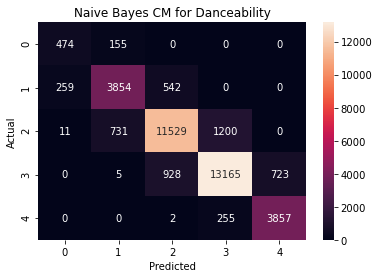

In [159]:
#graph the confusion matrix
sns.heatmap(nbCMDance, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes CM for Danceability')

In [160]:
#normalize the confusion matrix
nbCMnormDance = confusion_matrix(y_test, nbPredictionsDance)
nbCMnormDance = (nbCMnormDance.astype('float') / nbCMnormDance.sum(axis=1)[:, np.newaxis]).round(4)
nbCMnormDance

array([[7.536e-01, 2.464e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [5.560e-02, 8.279e-01, 1.164e-01, 0.000e+00, 0.000e+00],
       [8.000e-04, 5.430e-02, 8.558e-01, 8.910e-02, 0.000e+00],
       [0.000e+00, 3.000e-04, 6.260e-02, 8.883e-01, 4.880e-02],
       [0.000e+00, 0.000e+00, 5.000e-04, 6.200e-02, 9.375e-01]])

Text(0.5, 1.0, 'Naive Bayes Normalized CM for Danceability')

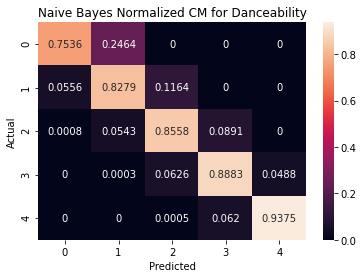

In [161]:
#graph the normalized confusion matrix
sns.heatmap(nbCMnormDance, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Normalized CM for Danceability')

In [162]:
nbAccuracyDance = accuracy_score(y_test, nbPredictionsDance)
nbAccuracyDance

0.8723534093924118

#### Conclusion: 
Utilizing Naive Bayes to predict song 'danceability' from various attributes has exceeded expectations with an 87.24% accuracy rate, surpassing our initial hypothesis. This highlights Naive Bayes' effectiveness in analyzing musical traits and confirms a strong link between these attributes and danceability.

## NAIVE BAYES FOR MODELING TEMPO

#### Question:
After trying to determine trends in tempo with a linear model, it was clear categories were since the relationship in tempo is not linear.

Assuming we were given the rest of the attributes (including 'Popularity', but without its categories) for a random song, how accurately could we predict the 'tempo' of that song?

#### Hypothesis:
Intuitively, since things like danceability and valence tend to impact tempo, we think we could get within 80% accurate of guessing which category of tempo the song could fall into.

In [163]:
songAtts['tempoCat'] = pd.cut(songAtts['Tempo'], bins=[-0.01, 0.19, 0.39, 0.59, 0.79, 1], labels=False)
songAtts['tempoCat'] = songAtts['tempoCat'].astype(int)

In [164]:
#split the data into training and testing sets
X = songAtts.drop(['tempoCat', 'danceCat', 'popYN', 'popCat'], axis=1)
y = songAtts['tempoCat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [165]:
# Initialize the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

In [166]:
# Fit the model
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [167]:
# Predict on the test data
nbPredictionsTempo = nb_classifier.predict(X_test)

In [168]:
# Confusion matrix
nbCMTempo = confusion_matrix(y_test, nbPredictionsTempo)
nbCMTempo

array([[  129,    13,     0,     0,     0],
       [   61,  9177,  1133,     0,     0],
       [    2,  1137, 18389,   519,     0],
       [    0,     0,   602,  6193,    28],
       [    0,     0,     0,    20,   287]], dtype=int64)

Text(0.5, 1.0, 'Naive Bayes CM for Tempo')

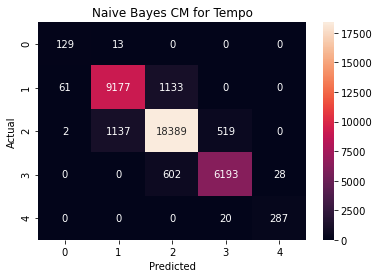

In [169]:
#graph the confusion matrix
sns.heatmap(nbCMTempo, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes CM for Tempo')

In [170]:
#normalize the confusion matrix
nbCMnormTempo = confusion_matrix(y_test, nbPredictionsTempo)
nbCMnormTempo = (nbCMnormTempo.astype('float') / nbCMnormTempo.sum(axis=1)[:, np.newaxis]).round(4)
nbCMnormTempo

array([[9.085e-01, 9.150e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [5.900e-03, 8.849e-01, 1.092e-01, 0.000e+00, 0.000e+00],
       [1.000e-04, 5.670e-02, 9.173e-01, 2.590e-02, 0.000e+00],
       [0.000e+00, 0.000e+00, 8.820e-02, 9.077e-01, 4.100e-03],
       [0.000e+00, 0.000e+00, 0.000e+00, 6.510e-02, 9.349e-01]])

Text(0.5, 1.0, 'Naive Bayes Normalized CM for Tempo')

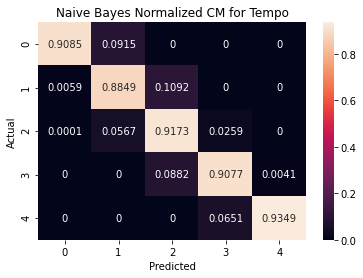

In [171]:
#graph the normalized confusion matrix
sns.heatmap(nbCMnormTempo, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Normalized CM for Tempo')

In [172]:
nbAccuracyTempo = accuracy_score(y_test, nbPredictionsTempo)
nbAccuracyTempo

0.906739188113558

#### Conclusion:

Given the attributes of a song, this Naive Bayes model is able to get within 90% accurate of the category of tempo (low to high, 5 subsections) the song belongs in.